# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './train.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

one example of training set:
label: Priority road


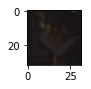

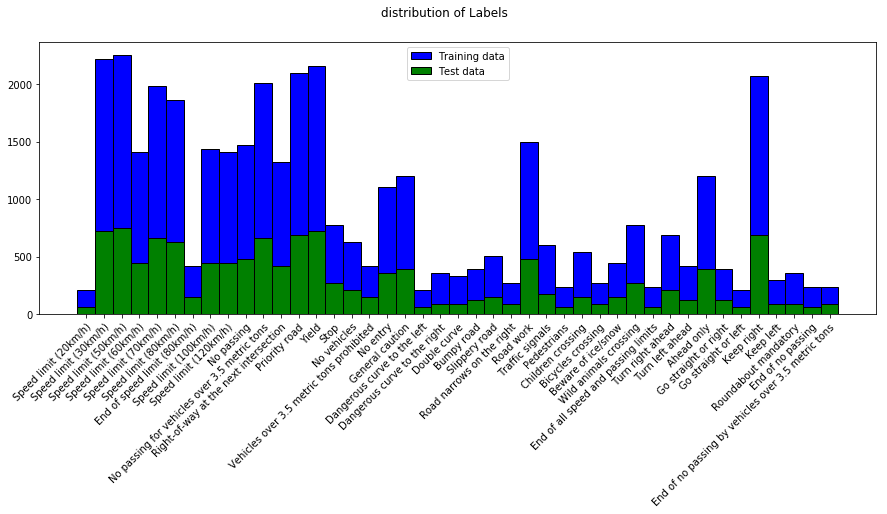

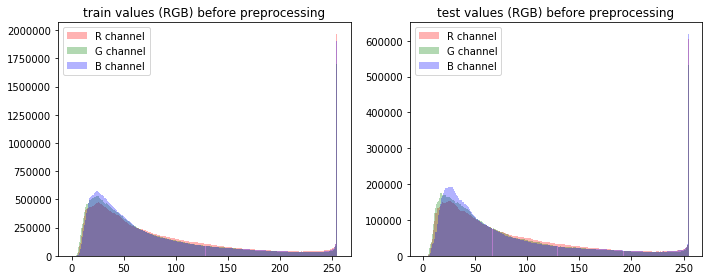

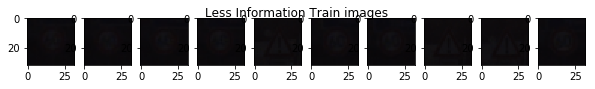

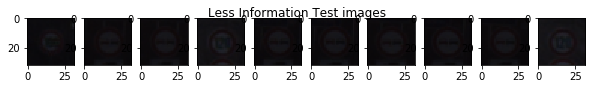

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import pandas as pd
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Display randomly one sample of trainning set 
print ('one example of training set:')
rand_index = random.randint(0, len(X_train))
image = X_train[rand_index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image)
sign = pd.read_csv('signnames.csv')
print('label: {}'.format(sign.loc[y_train[rand_index]]['SignName']))

#Display distribuion of train labels and test labels
bins = [i-0.5 for i in range(n_classes+1)]
plt.figure(figsize=(15, 5))
plt.hist(y_train, bins, facecolor = 'b', edgecolor = 'black', label = 'Training data')
plt.hist(y_test, bins, facecolor = 'g', edgecolor = 'black', label = 'Test data')
plt.legend(loc = 'upper center')
plt.suptitle('distribution of Labels')
plt.xticks(sign['ClassId'].values, sign['SignName'].values, rotation = 45, ha = 'right', rotation_mode="anchor")
plt.show()

#Distribution of input value by channel color before preprocessing
fig, (train, test) = plt.subplots(ncols=2, figsize=(10, 4))
train.hist(X_train[:,:,:,0].reshape(-1), 255, color = 'red', alpha = 0.3, label = 'R channel')
train.hist(X_train[:,:,:,1].reshape(-1), 255, color = 'green', alpha = 0.3, label = 'G channel')
train.hist(X_train[:,:,:,2].reshape(-1), 255, color = 'blue', alpha = 0.3, label = 'B channel')
train.set_title('train values (RGB) before preprocessing')
train.legend(loc = 'upper left')
test.hist(X_test[:,:,:,0].reshape(-1), 255, color = 'red', alpha=0.3, label = 'R channel')
test.hist(X_test[:,:,:,1].reshape(-1), 255, color = 'green', alpha=0.3, label = 'G channel')
test.hist(X_test[:,:,:,2].reshape(-1), 255, color = 'blue', alpha=0.3, label = 'B channel')
test.set_title('test values (RGB) before preprocessing')
test.legend(loc = 'upper left')
fig.tight_layout()
plt.show()

#Display the 10 worst images according to information
lessinf_train_index = []
std = np.std(X_train,axis=(1,2,3))
fig = plt.figure(figsize=(10,1))
fig.suptitle('Less Information Train images')
for i in range(1,11): 
    im_index = np.argmin(std)
    plt.subplot(1,10,i)
    plt.imshow(X_train[im_index])
    std[im_index] += 1000
    lessinf_train_index.append(im_index)
    
lessinf_test_index = []
std = np.std(X_test,axis=(1,2,3))
fig = plt.figure(figsize=(10,1))
fig.suptitle('Less Information Test images')
for i in range(1,11): 
    im_index = np.argmin(std)
    plt.subplot(1,10,i)
    plt.imshow(X_test[im_index])
    std[im_index] += 1000
    lessinf_test_index.append(im_index)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


After preprocessing
shape of training set: (117627, 32, 32, 3)
shape of testing set: (12630, 32, 32, 3)
training - mean: -0.08220596611499786, std: 0.2643488645553589, min: -0.5, max: 0.5
testing - mean: -0.09039708226919174, std: 0.2673429548740387, min: -0.5, max: 0.5


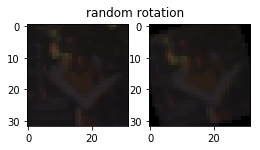

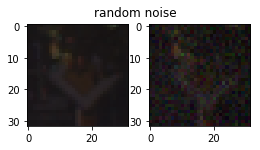

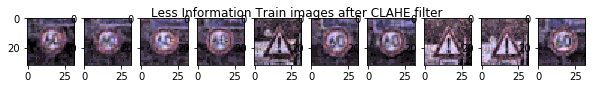

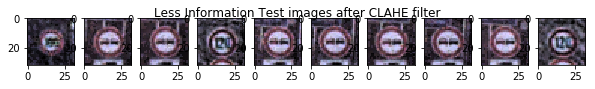

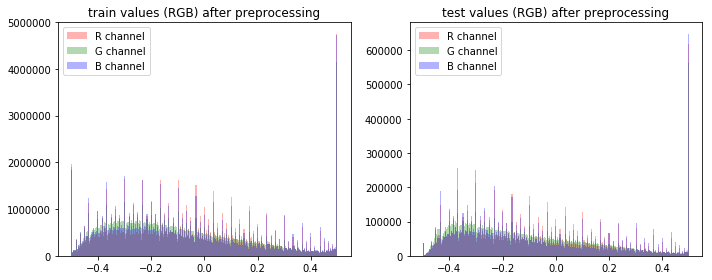

In [4]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from skimage.transform import rotate
from skimage.util import random_noise
from skimage import img_as_ubyte
from skimage.exposure import equalize_adapthist


# grow up the train set with transform images
# random rotation of images
X_train_rotate = []
for i in range(len(X_train)):
    angle = random.randint(-20, 20)
    X_train_rotate.append(img_as_ubyte(rotate(X_train[i], angle)))
X_train_rotate = np.array(X_train_rotate)
# add random noises
X_train_noisy = img_as_ubyte(random_noise(X_train, var = 0.001))
# concanate normal training set, rotate set, and noisy set
X_train_prep = np.append(X_train, X_train_rotate, axis=0)
X_train_prep = np.append(X_train_prep, X_train_noisy, axis=0)
y_train_prep = np.append(y_train, y_train, axis=0)
y_train_prep = np.append(y_train_prep, y_train, axis=0)

# Display of rotated image
fig = plt.figure(figsize=(4,2))
fig.suptitle('random rotation')
plt.subplot(1,2,1)
plt.imshow(X_train[rand_index])
plt.subplot(1,2,2)
plt.imshow(rotate(X_train[rand_index], angle=15))

# Display of noisy image
fig = plt.figure(figsize=(4,2))
fig.suptitle('random noise')
plt.subplot(1,2,1)
plt.imshow(X_train[rand_index])
plt.subplot(1,2,2)
plt.imshow(random_noise(X_train[rand_index], var = 0.001))

def preprocess(images_data):
    """preprocessing function. In this case, CLAHE filter then mean close to 0"""
    clahe = []
    for image in images_data:
        clahe.append(equalize_adapthist(image).astype(np.float32))
    return np.array(clahe) - 0.5

#Display the 10 worst images according to information after CLAHE filter
fig = plt.figure(figsize=(10,1))
fig.suptitle('Less Information Train images after CLAHE filter')
j = 1
for i in lessinf_train_index: 
    plt.subplot(1,10,j)
    plt.imshow(equalize_adapthist( X_train[i] ))
    j += 1
    
fig = plt.figure(figsize=(10,1))
fig.suptitle('Less Information Test images after CLAHE filter')
j = 1
for i in lessinf_test_index: 
    plt.subplot(1,10,j)
    plt.imshow(equalize_adapthist( X_test[i] ))
    j += 1

    
# preprocess training and testing sets
X_train_prep = preprocess(X_train_prep)
X_test_prep = preprocess(X_test)

    
print('After preprocessing')
print('shape of training set: {}'.format(X_train_prep.shape))
print('shape of testing set: {}'.format(X_test_prep.shape))
print('training - mean: {}, std: {}, min: {}, max: {}'.format(X_train_prep.mean(),X_train_prep.std(),
                                                              X_train_prep.min(),X_train_prep.max()))
print('testing - mean: {}, std: {}, min: {}, max: {}'.format(X_test_prep.mean(),X_test_prep.std(),
                                                             X_test_prep.min(),X_test_prep.max()))



#Distribution of input value by channel color after preprocessing
fig, (train, test) = plt.subplots(ncols=2, figsize=(10, 4))
train.hist(X_train_prep[:,:,:,0].reshape(-1), 255, color = 'red', alpha = 0.3, label = 'R channel')
train.hist(X_train_prep[:,:,:,1].reshape(-1), 255, color = 'green', alpha = 0.3, label = 'G channel')
train.hist(X_train_prep[:,:,:,2].reshape(-1), 255, color = 'blue', alpha = 0.3, label = 'B channel')
train.set_title('train values (RGB) after preprocessing')
train.legend(loc = 'upper left')
test.hist(X_test_prep[:,:,:,0].reshape(-1), 255, color = 'red', alpha = 0.3, label = 'R channel')
test.hist(X_test_prep[:,:,:,1].reshape(-1), 255, color = 'green', alpha = 0.3, label = 'G channel')
test.hist(X_test_prep[:,:,:,2].reshape(-1), 255, color = 'blue', alpha = 0.3, label = 'B channel')
test.set_title('test values (RGB) after preprocessing')
test.legend(loc = 'upper left')
fig.tight_layout()
plt.show()

#Save the preprocessing data
with open('./X_train_prep.p', mode='wb+') as f:
    pickle.dump(X_train_prep, f)
with open('./y_train_prep.p', mode='wb+') as f:
    pickle.dump(y_train_prep, f)
with open('./X_test_prep.p', mode='wb+') as f:
    pickle.dump(X_test_prep, f)
with open('./y_test.p', mode='wb+') as f:
    pickle.dump(y_test, f)

### Checkpoint: Restore the data

In [1]:
import pickle
import numpy as np
import pandas as pd
import random
from skimage.exposure import equalize_adapthist

import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

with open('./X_train_prep.p', mode='rb') as f:
    X_train_prep = pickle.load(f)
with open('./y_train_prep.p', mode='rb') as f:
    y_train_prep = pickle.load(f)
with open('./X_test_prep.p', mode='rb') as f:
    X_test_prep = pickle.load(f)
with open('./y_test.p', mode='rb') as f:
    y_test = pickle.load(f)
    
    
def preprocess(images_data):
    """preprocessing function. In this case, CLAHE filter then mean close to 0"""
    clahe = []
    for image in images_data:
        clahe.append(equalize_adapthist(image).astype(np.float32))
    return np.array(clahe) - 0.5

n_classes = len(np.unique(y_train_prep))
sign = pd.read_csv('signnames.csv')

### Hyperparameter

In [2]:
EPOCHS = 25
BATCH_SIZE = 252
rate = 0.001


### Split Data into Training, Validation and Testing Sets

nb of splits: 25 equal to EPOCHS
shape of train features: (111745, 32, 32, 3), shape of train labels: (111745,)
shape of validation features: (5882, 32, 32, 3), shape of validation labels: (5882,)
shape of test features: (12630, 32, 32, 3), shape of test labels: (12630,)


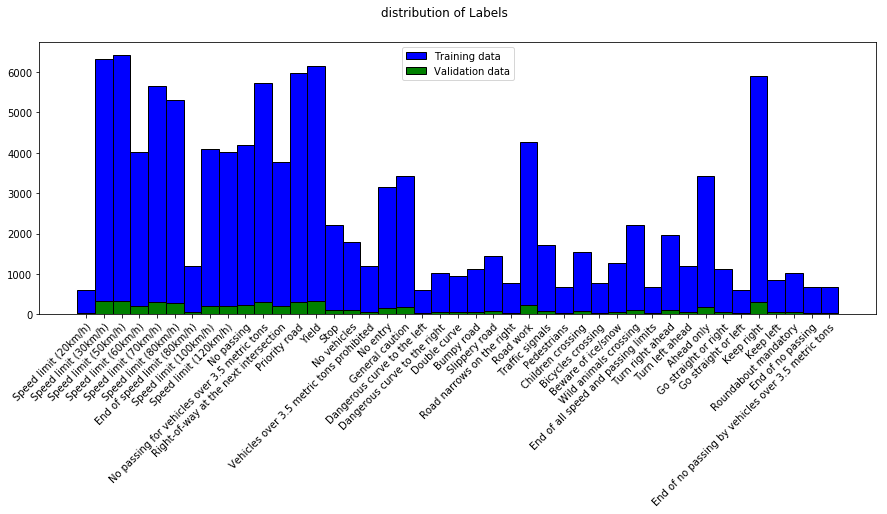

In [3]:
### Split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import StratifiedShuffleSplit
# I use Stratified ShuffleSplit cross-validator
sss = StratifiedShuffleSplit(n_splits=EPOCHS, test_size=0.05)
for train_index, valid_index in sss.split(X_train_prep, y_train_prep):
    X_train_split, y_train_split = X_train_prep[train_index], y_train_prep[train_index]
    X_valid_split, y_valid_split = X_train_prep[valid_index], y_train_prep[valid_index]
    break

print('nb of splits: {} equal to EPOCHS'.format(sss.get_n_splits(X_train_prep, y_train_prep)))

print('shape of train features: {}, shape of train labels: {}'.format(X_train_split.shape ,y_train_split.shape))
print('shape of validation features: {}, shape of validation labels: {}'.format(X_valid_split.shape,y_valid_split.shape))
print('shape of test features: {}, shape of test labels: {}'.format(X_test_prep.shape,y_test.shape))

assert X_train_split.shape[0]==y_train_split.shape[0]
assert X_valid_split.shape[0]==y_valid_split.shape[0]
assert X_test_prep.shape[0]==y_test.shape[0]
assert ((X_train_split.shape[1], X_train_split.shape[2], X_train_split.shape[3]) 
        == (X_test_prep.shape[1], X_test_prep.shape[2], X_test_prep.shape[3]))

#Display distribuion of train labels and valid labels
bins = [i-0.5 for i in range(n_classes+1)]
plt.figure(figsize=(15, 5))
plt.hist(y_train_split, bins, facecolor = 'b', edgecolor = 'black', label = 'Training data')
plt.hist(y_valid_split, bins, facecolor = 'g', edgecolor = 'black', label = 'Validation data')
plt.legend(loc = 'upper center')
plt.suptitle('distribution of Labels')
plt.xticks(sign['ClassId'].values, sign['SignName'].values, rotation = 45, ha = 'right', rotation_mode="anchor")
plt.show()

### Model Architecture

In [4]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten


def MyNet(x, pb_dropout):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Store layers weight & bias
    weights = {
        'wc1': tf.Variable(tf.random_normal([4, 4, X_train_prep.shape[3], 64],mu,sigma)),
        'wc2': tf.Variable(tf.random_normal([4, 4, 64, 64],mu,sigma)),
        'wc3': tf.Variable(tf.random_normal([3, 3, 64, 128],mu,sigma)),
        'wfc4': tf.Variable(tf.random_normal([128, 150],mu,sigma)),
        'wfc5': tf.Variable(tf.random_normal([150, 100],mu,sigma)),
        'wfc6': tf.Variable(tf.random_normal([100, n_classes],mu,sigma))}

    biases = {
        'bc1': tf.Variable(tf.random_normal([64],mu,sigma)),
        'bc2': tf.Variable(tf.random_normal([64],mu,sigma)),
        'bc3': tf.Variable(tf.random_normal([128],mu,sigma)),
        'bfc4': tf.Variable(tf.random_normal([150],mu,sigma)),
        'bfc5': tf.Variable(tf.random_normal([100],mu,sigma)),
        'bfc6': tf.Variable(tf.random_normal([n_classes],mu,sigma))}
    
    # Layer 1: Convolutional. pooling. Activation
    with tf.name_scope("layer1"):
        c1 = conv2d(x, weights['wc1'], biases['bc1'])
        c1 = maxpool(c1)
        c1 = tf.nn.dropout(c1, pb_dropout)
        c1 = tf.nn.relu(c1)
    
     # Layer 2: Convolutional. pooling. Activation
    with tf.name_scope("layer2"):
        c2 = conv2d(c1, weights['wc2'], biases['bc2'])
        c2 = maxpool(c2)
        c2 = tf.nn.dropout(c2, pb_dropout)
        c2 = tf.nn.relu(c2)
    
    # Layer 3: Convolutional. Activation
    with tf.name_scope("layer3"):
        c3 = conv2d(c2, weights['wc3'], biases['bc3'])
        c3 = maxpool(c3)
        c3 = tf.nn.dropout(c3, pb_dropout)
        c3 = tf.nn.relu(c3)
    
    with tf.name_scope("layer4"):
    # Flatten layer3
        flat = flatten(c3)
    
    # Layer 4: Fully Connected. 
        fc4 = tf.add(tf.matmul(flat, weights['wfc4']), biases['bfc4'])
        fc4 = tf.nn.relu(fc4)
    
    # Layer 5: Fully Connected.
    with tf.name_scope("layer5"):
        fc5 = tf.add(tf.matmul(fc4, weights['wfc5']), biases['bfc5'])
        fc5 = tf.nn.relu(fc5)

    # Layer 6(output layer): Fully Connected. 
    with tf.name_scope("layer6"):
        logits = tf.add(tf.matmul(fc5, weights['wfc6']), biases['bfc6'])
    
    #Add histograms summaries for weights - for Tensorboard
    tf.summary.histogram('wc1', weights['wc1'])
    tf.summary.histogram('wc2', weights['wc2'])
    tf.summary.histogram('wc3', weights['wc3'])
    tf.summary.histogram('wfc4', weights['wfc4'])
    tf.summary.histogram('wfc5', weights['wfc5'])
    tf.summary.histogram('wfc6', weights['wfc6'])
    
    return logits

def maxpool(input,k=2):
    ksize = [1, k, k, 1]
    strides = [1, 2, 2, 1]
    padding = 'VALID'
    return tf.nn.max_pool(input, ksize, strides, padding)

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return x


print('Model is defined')

Model is defined


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [5]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

tf.reset_default_graph()

# Input and labels
x = tf.placeholder(tf.float32, (None, X_train_prep.shape[1], X_train_prep.shape[2], X_train_prep.shape[3]))
y = tf.placeholder(tf.uint8, (None))
pb_dropout = tf.placeholder(tf.float32, (None))
one_hot_y = tf.one_hot(y, n_classes)

# training part
logits = MyNet(x, pb_dropout)
with tf.name_scope("loss"):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    training_operation = optimizer.minimize(loss_operation)
    # for Tensorboard
    tf.summary.scalar("loss", loss_operation)

#testing part
with tf.name_scope("accuracy"):
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    # for Tensorboard
    tf.summary.scalar("accuracy", accuracy_operation)
#saver
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, pb_dropout: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    

    # for Tensorboard
    writer = tf.summary.FileWriter('./logs', sess.graph)
    merged = tf.summary.merge_all()
    
    print("Training...")
    print()
    i_epoch = 1
    for train_index, valid_index in sss.split(X_train_prep, y_train_prep):
        X_train_split, y_train_split = X_train_prep[train_index], y_train_prep[train_index]
        X_valid_split, y_valid_split = X_train_prep[valid_index], y_train_prep[valid_index]
        for offset in range(0, len(X_train_split), BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_split[offset:end], y_train_split[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, pb_dropout: 0.5})
            
        summary, validation_accuracy = sess.run([merged, accuracy_operation], feed_dict={x: X_valid_split, y: y_valid_split, pb_dropout: 1.0})
        writer.add_summary(summary, i_epoch)
        print("EPOCH {} ...".format(i_epoch))
        i_epoch += 1
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    test_accuracy = evaluate(X_test_prep, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    saver.save(sess, './Traffic_Signs')
    print("Model saved")
    

Training...

EPOCH 1 ...
Validation Accuracy = 0.631

EPOCH 2 ...
Validation Accuracy = 0.882

EPOCH 3 ...
Validation Accuracy = 0.924

EPOCH 4 ...
Validation Accuracy = 0.948

EPOCH 5 ...
Validation Accuracy = 0.964

EPOCH 6 ...
Validation Accuracy = 0.973

EPOCH 7 ...
Validation Accuracy = 0.973

EPOCH 8 ...
Validation Accuracy = 0.978

EPOCH 9 ...
Validation Accuracy = 0.983

EPOCH 10 ...
Validation Accuracy = 0.982

EPOCH 11 ...
Validation Accuracy = 0.984

EPOCH 12 ...
Validation Accuracy = 0.987

EPOCH 13 ...
Validation Accuracy = 0.985

EPOCH 14 ...
Validation Accuracy = 0.988

EPOCH 15 ...
Validation Accuracy = 0.987

EPOCH 16 ...
Validation Accuracy = 0.990

EPOCH 17 ...
Validation Accuracy = 0.990

EPOCH 18 ...
Validation Accuracy = 0.990

EPOCH 19 ...
Validation Accuracy = 0.992

EPOCH 20 ...
Validation Accuracy = 0.992

EPOCH 21 ...
Validation Accuracy = 0.991

EPOCH 22 ...
Validation Accuracy = 0.990

EPOCH 23 ...
Validation Accuracy = 0.994

EPOCH 24 ...
Validation Accura

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to u

shape of new testing set: (10, 32, 32, 3), type of value: uint8


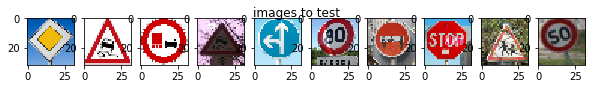

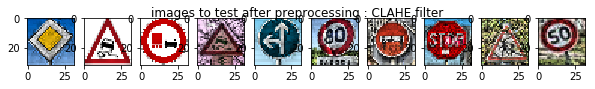

In [10]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from skimage.data import imread
from skimage import img_as_ubyte
from skimage.transform import resize

def load(fimage):
    im = imread('./new_images/' + fimage)
    im = img_as_ubyte(resize(im,(32,32)))
    return im

# load images, display its, and set the testing batch
images = ['test1.jpg', 'test2.png', 'test3.png', 'test4.jpg', 'test5.jpg',
          'test6.jpg', 'test7.jpg', 'test8.jpg', 'test9.jpg', 'test10.jpg']
X_test_web=[]
fig = plt.figure(figsize=(10,1))
fig.suptitle('images to test')
for i in range(len(images)):
    X_test_web.append(load(images[i]))
    plt.subplot(1,10,i+1)
    plt.imshow(X_test_web[i])
    
fig = plt.figure(figsize=(10,1))
fig.suptitle('images to test after preprocessing : CLAHE filter')
for i in range(len(images)):
    plt.subplot(1,10,i+1)
    plt.imshow(equalize_adapthist(X_test_web[i]))


X_test_web=np.array(X_test_web)
print('shape of new testing set: {}, type of value: {}'.format(X_test_web.shape,X_test_web.dtype))

### Predict the Sign Type for Each Image

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


photo 1: Priority road
photo 2: Slippery road
photo 3: No passing for vehicles over 3.5 metric tons
photo 4: Slippery road
photo 5: Go straight or left
photo 6: Speed limit (80km/h)
photo 7: Stop
photo 8: Stop
photo 9: Road work
photo 10: Speed limit (30km/h)


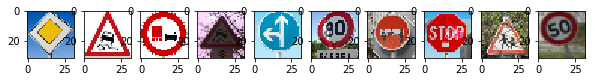

In [11]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# Preprocess the new images
X_test_web_prep = preprocess(X_test_web)
y_test_web = [12, 23, 10, 23, 37, 5, 17, 14, 28, 2]

with tf.Session() as sess:
    # restore the weights of trained model
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    # prediction
    logits_test_web = sess.run(logits, feed_dict={x: X_test_web_prep, pb_dropout: 1.0})

predict = np.argmax(logits_test_web, axis=1)
fig = plt.figure(figsize=(10,1))
for i in range(len(X_test_web)):
    print('photo {}: {}'.format(i+1,sign.loc[predict[i]]['SignName']))
    plt.subplot(1,10,i+1)
    plt.imshow(X_test_web[i])

### Analyze Performance

In [12]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_web_accuracy = evaluate(X_test_web_prep, y_test_web)
print("Test Accuracy = {:.3f}".format(test_web_accuracy))

Test Accuracy = 0.700


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

photo 1:
Priority road prob:1.000
Traffic signals prob:0.000
Right-of-way at the next intersection prob:0.000
Bicycles crossing prob:0.000
Beware of ice/snow prob:0.000



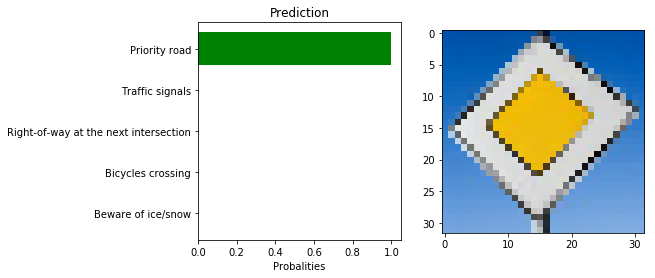

photo 2:
Slippery road prob:1.000
Bicycles crossing prob:0.000
Dangerous curve to the left prob:0.000
Beware of ice/snow prob:0.000
Wild animals crossing prob:0.000



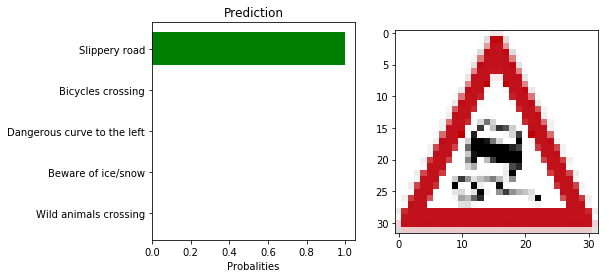

photo 3:
No passing for vehicles over 3.5 metric tons prob:1.000
No passing prob:0.000
Speed limit (60km/h) prob:0.000
Speed limit (80km/h) prob:0.000
End of no passing by vehicles over 3.5 metric tons prob:0.000



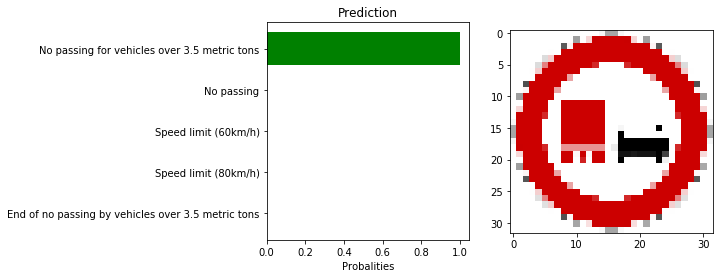

photo 4:
Slippery road prob:0.811
Bicycles crossing prob:0.077
Wild animals crossing prob:0.063
Dangerous curve to the left prob:0.023
Double curve prob:0.008



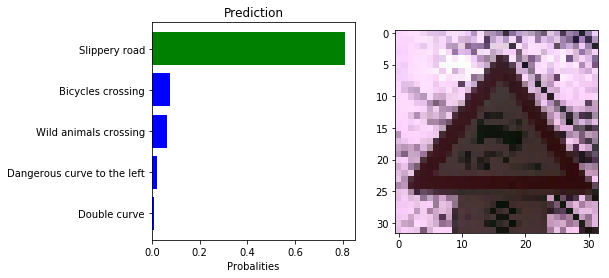

photo 5:
Go straight or left prob:1.000
Keep right prob:0.000
Turn left ahead prob:0.000
Roundabout mandatory prob:0.000
Ahead only prob:0.000



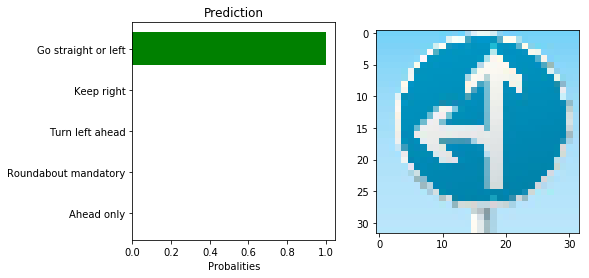

photo 6:
Speed limit (80km/h) prob:0.934
Speed limit (60km/h) prob:0.045
Speed limit (50km/h) prob:0.017
End of speed limit (80km/h) prob:0.004
Speed limit (30km/h) prob:0.000



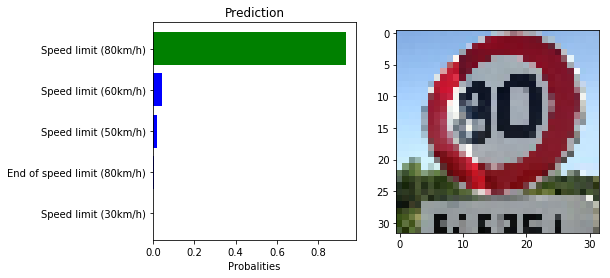

photo 7:
Stop prob:0.779
No entry prob:0.221
No passing for vehicles over 3.5 metric tons prob:0.000
Bicycles crossing prob:0.000
No vehicles prob:0.000



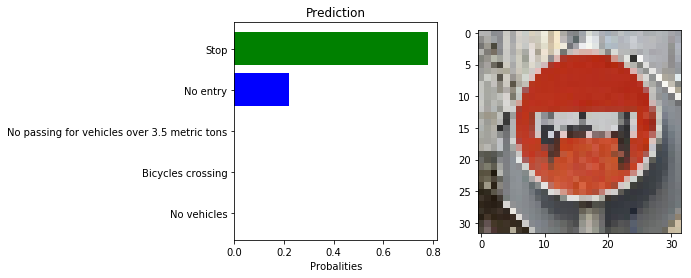

photo 8:
Stop prob:1.000
Bicycles crossing prob:0.000
No entry prob:0.000
Speed limit (30km/h) prob:0.000
Speed limit (80km/h) prob:0.000



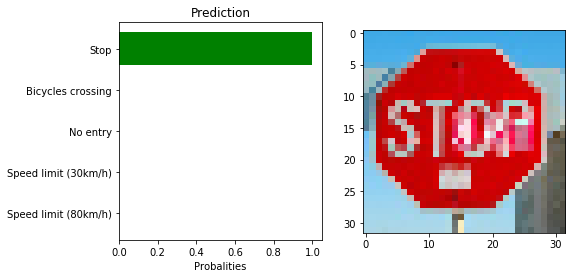

photo 9:
Road work prob:0.248
Double curve prob:0.166
Wild animals crossing prob:0.105
Slippery road prob:0.086
Speed limit (50km/h) prob:0.078



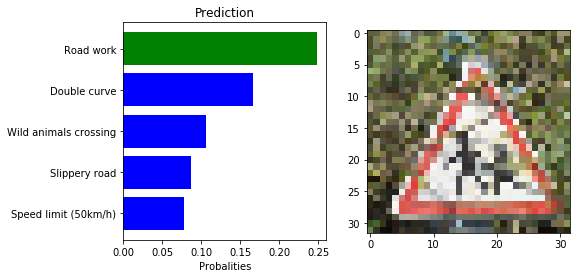

photo 10:
Speed limit (30km/h) prob:0.680
Speed limit (50km/h) prob:0.313
Speed limit (80km/h) prob:0.006
Speed limit (20km/h) prob:0.001
Speed limit (70km/h) prob:0.000



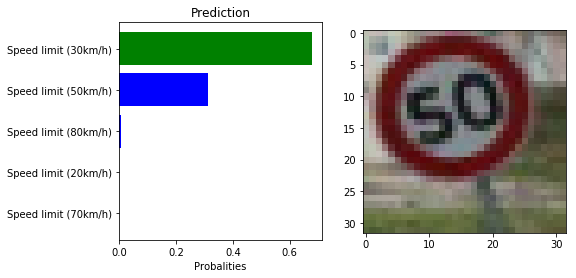

In [9]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    prob = tf.nn.softmax(logits)
    top5 = tf.nn.top_k(prob, k=5)
    top5 = sess.run(top5, feed_dict={x: X_test_web_prep, pb_dropout: 1.0})

fig = plt.figure(figsize=(10,1))
for i in range(len(top5.indices)):
    print('photo {}:'.format(i+1))
    for j in range(len(top5.indices[i])):
        print('{} prob:{:.3f}'.format(sign.loc[top5.indices[i][j]]['SignName'],top5.values[i][j]))
    print()
    fig, (bar, photo) = plt.subplots(ncols=2, figsize=(8, 4))
    bar.barh(range(len(top5.indices[i])), top5.values[i], align='center', color=['g','b','b','b','b'])
    bar.set_yticks(range(len(top5.indices[i])))
    bar.set_yticklabels(sign.loc[top5.indices[i]]['SignName'])
    bar.invert_yaxis()  # labels read top-to-bottom
    bar.set_xlabel('Probalities')
    bar.set_title('Prediction')
    photo.imshow(X_test_web[i])
    plt.show()
    

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 